# Introduction

1) Objectives

Research shows that acquiring a new customers is much more expensive than retaining an old customer.

Every Telecom company wants to stop its customer from moving to another company - the churn phenomenon

This project highlights how can a company predict which customers are going to churn and take action on it so as to stop them from churning.

2) Deliverables

Actionable insights for each segment on how to stop a customer from churning.

3) Workflow

    Explore and Analyse Data
    Divide customer base into homogenous segments.
    Study Churn on each segment and understand the reason to churn.
    Provide targeted feedback for each segment to handle customer churn.

4) Results

Savings of dollar 46307.8  per month or  $555693.6 annual potential revenue loss due to churn

Lets begin

In [10]:
#Importing necessary modules for Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#Import our train and test dataset
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [12]:
#combining to a single dataset
data =  pd.concat([train,test])

In [13]:
data.shape

(5000, 21)

Data consists of details of 5000 customers such as call minutes , plans active , messages sent etc.

In [14]:
data.head()
#Viewing the first 5 rows of the data

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [15]:
#dropping unneeded column
data = data.drop('Unnamed: 0' , axis = 1)

In [16]:
#reset index column
data.reset_index(inplace=True)

# Let us understand the dataset in detail

    We get some descriptive analysis of our variables for a single customer:
    Maximum Account length is 243 months minimum is 1 ,
    Max number of customer Service calls are 9.
    Max total international minutes is 20
    etc

In [20]:
data.describe()

,index,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1388.277800,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,921.242753,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,624.750000,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,1249.500000,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,2082.250000,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,3332.000000,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [21]:
# to know the different datatypes in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
index                            5000 non-null int64
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null object
international_plan               5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

# Data Exploration

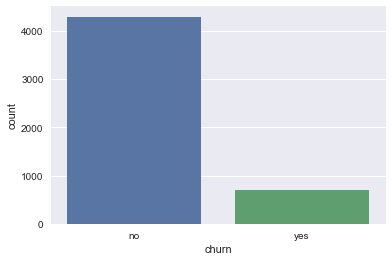

In [22]:
# to understand the ratio of churn customers
sns.countplot(data['churn'])

In [23]:
data['churn'].value_counts()

no     4293
yes     707
Name: churn, dtype: int64

The churn results are highly imbalanced which is expected.

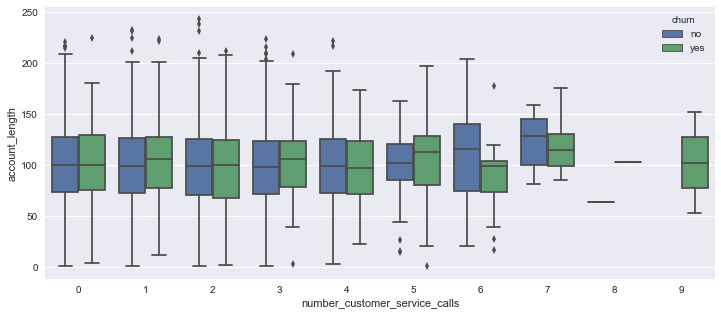

In [24]:
#Churn analysis for no of customer service calls vs account length
plt.figure(figsize = (12,5))
sns.boxplot(data['number_customer_service_calls'],data['account_length'],hue = data['churn'])

    The above chart shows a relation the relation between Account Length , Customer service calls and churn rate.
    Customers with less account length and more customer service calls are more likely to churn

<function matplotlib.pyplot.tight_layout>

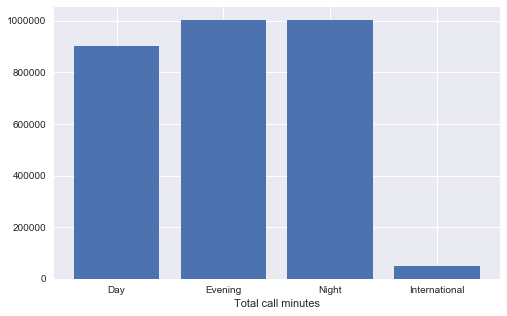

In [30]:
fig, ax = plt.subplots(figsize=(8,5))

calls = ('Day', 'Evening', 'Night','International')
x_pos = np.arange(len(calls))
count = (data['total_day_minutes'].sum(), data['total_eve_minutes'].sum(), data['total_night_minutes'].sum(), data['total_intl_minutes'].sum())

ax.bar(x_pos, count, align='center', ecolor ='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(calls)
ax.set_xlabel('Total call minutes')
plt.tight_layout

The above chart shows comparison of total call minutes for customer

<function matplotlib.pyplot.tight_layout>

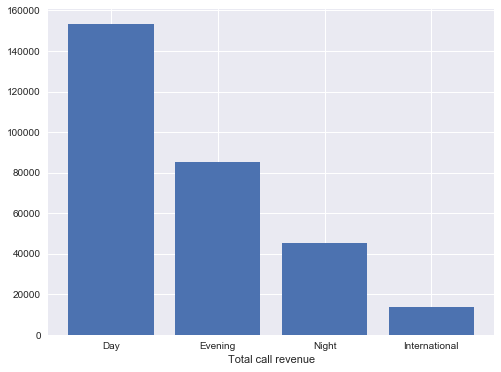

In [31]:
fig ,ax = plt.subplots(figsize=(8,6))

calls = ('Day', 'Evening', 'Night','International')
x_pos = np.arange(len(calls))
charge = (data['total_day_charge'].sum(), data['total_eve_charge'].sum(), data['total_night_charge'].sum(), data['total_intl_charge'].sum())

ax.bar(x_pos, charge, align='center')
ax.set_xticks(x_pos)
ax.set_xticklabels(calls)
ax.set_xlabel('Total call revenue')
plt.tight_layout

The above chart shows total revenue for Day,Evening,Night and International

# Feature Engineering

In [33]:
#Creating a new feature Total charge
data['Total_Charge'] = data['total_day_charge']+data['total_eve_charge']+data['total_night_charge']+data['total_intl_charge']

In [34]:
data['Total_Charge'].head()
#First few entries

0    75.56
1    59.24
2    62.29
3    66.80
4    52.09
Name: Total_Charge, dtype: float64

In [35]:
#Creating new features for rates for day,evening,night and international.
data['day_rate'] = data['total_day_charge']/data['total_day_minutes']
data['eve_rate'] = data['total_eve_charge']/data['total_eve_minutes']
data['night_rate'] = data['total_night_charge']/data['total_night_minutes']
data['intl_rate'] = data['total_intl_charge']/data['total_intl_minutes']

In [36]:
data.head()

,index,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,Total_Charge,day_rate,eve_rate,night_rate,intl_rate
0,0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,10.0,3,2.70,1,no,75.56,0.170011,0.085005,0.044994,0.270000
1,1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,13.7,3,3.70,1,no,59.24,0.169988,0.085013,0.045008,0.270073
2,2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,12.2,5,3.29,0,no,62.29,0.170008,0.084983,0.045018,0.269672
3,3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,6.6,7,1.78,2,no,66.80,0.170007,0.084976,0.044997,0.269697
4,4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,10.1,3,2.73,3,no,52.09,0.170006,0.085030,0.044997,0.270297


# Missing Values

In [37]:
data[data.columns[data.isnull().any()]].isnull().sum()

day_rate       2
eve_rate       1
night_rate     1
intl_rate     24
dtype: int64

In [38]:
from sklearn.preprocessing import Imputer

In [39]:
imp = Imputer(missing_values='NaN' , strategy='mean', axis=0)

In [40]:
data[['day_rate','eve_rate','night_rate','intl_rate']] = imp.fit_transform(data[['day_rate','eve_rate','night_rate','intl_rate']])

In [41]:
data[data.columns[data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

There are no missing values in our data

# Selecting the numerical customer detail variables for segmentation

In [42]:
df = data.select_dtypes(exclude=['object'])

In [43]:
df.head()

,index,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Total_Charge,day_rate,eve_rate,night_rate,intl_rate
0,0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,75.56,0.170011,0.085005,0.044994,0.270000
1,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,59.24,0.169988,0.085013,0.045008,0.270073
2,2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,62.29,0.170008,0.084983,0.045018,0.269672
3,3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,66.80,0.170007,0.084976,0.044997,0.269697
4,4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,52.09,0.170006,0.085030,0.044997,0.270297


# Standardize the variables before Clustering

In [44]:
#Standardizing the variables before K-means clustering
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
df1 = rc.fit_transform(df)
df2 = pd.DataFrame(df1, columns = df.columns)

In [45]:
df2.head()

,index,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Total_Charge,day_rate,eve_rate,night_rate,intl_rate
0,-0.857290,0.518519,1.470588,1.172414,0.384615,1.172890,-0.053156,-0.037037,-0.053819,0.653392,...,0.652459,-0.085714,-0.333333,-0.085106,0.0,1.153639,0.257362,0.203246,-0.249440,-0.120125
1,-0.856604,0.129630,1.529412,-0.255172,0.884615,-0.255682,-0.081211,0.111111,-0.081597,0.796460,...,0.796721,0.971429,-0.333333,0.978723,0.0,-0.019407,-0.602459,0.513052,0.319905,0.030155
2,-0.855918,0.685185,0.000000,0.873103,0.538462,0.873377,-1.178295,0.370370,-1.178819,-0.557522,...,-0.557377,0.542857,0.333333,0.542553,-1.0,0.199820,0.144878,-0.662057,0.750773,-0.795157
3,-0.855232,-0.296296,0.000000,1.645517,-1.115385,1.646104,-2.053894,-0.444444,-2.053819,-0.051622,...,-0.052459,-1.057143,1.000000,-1.063830,1.0,0.523989,0.089103,-0.972230,-0.103331,-0.744018
4,-0.854545,-0.462963,0.000000,-0.184828,0.500000,-0.185065,-0.778147,0.814815,-0.777778,-0.199115,...,-0.200000,-0.057143,-0.333333,-0.053191,2.0,-0.533333,0.064381,1.217418,-0.108860,0.491413


# K Means Clustering

In [46]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

K = range(2,15)
KM = [KMeans(n_clusters=k).fit(df2) for k in K] #modeling on range of K values
centroids = [k.cluster_centers_ for k in KM] #calculating centroids of each model

D_k = [cdist(df2, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/df2.shape[0] for d in dist]

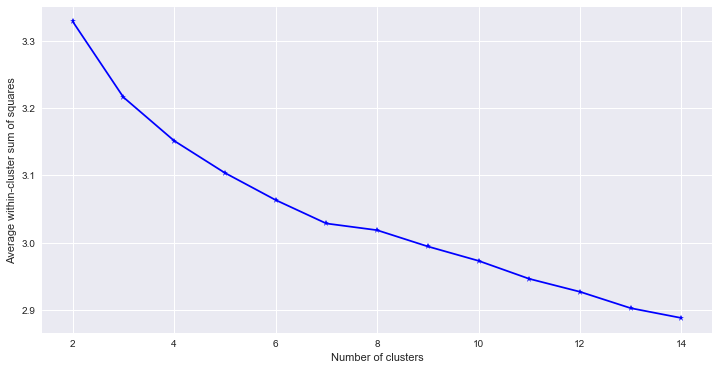

In [47]:
# elbow curve
fig = plt.figure(figsize=(12,6))
plt.plot(K, avgWithinSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')

In [48]:
#Seleting K = 5 from the above elbow chart
KM_Model = KMeans(n_clusters=5).fit(df2)
centroids = KM_Model.cluster_centers_
labels = pd.DataFrame(KM_Model.labels_)
labels.rename(columns={0:'CLUSTER'}, inplace=True)

In [49]:
data.shape

(5000, 26)

In [50]:
labels.shape

(5000, 1)

In [51]:
#joining cluster column
df3 = pd.concat([data,labels] , axis = 1)

In [52]:
df3.shape

(5000, 27)

In [53]:
df3.groupby(by="CLUSTER").size()

CLUSTER
0    1151
1     986
2    1113
3     845
4     905
dtype: int64

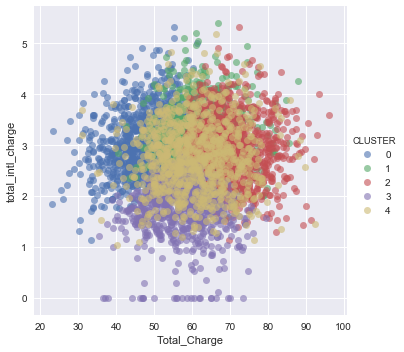

In [57]:
plt.figure(figsize=(7,7))
sns.lmplot('Total_Charge','total_intl_charge', df3, hue = 'CLUSTER',fit_reg=False,scatter_kws={'alpha':0.6})

In [55]:
#Saving the customer segments
df3.to_csv('Clusters.csv')